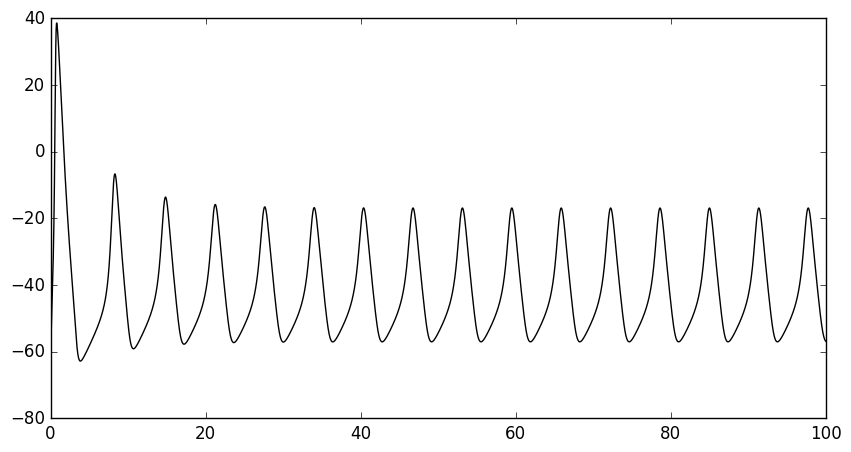

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f30a2a32128>

In [22]:
using PyPlot
using Distributions;


dt = 0.001;           # Width of the integration step;
TotalTime = 100;
N  = round(Int,TotalTime/dt);         # Number of integration steps;

C      = 0.010;   # This is the membrane (specific) capacitance [uF/mm^2]
gnamax = 1.2;     # This is the membrane max (specific) sodium conductance [mS/mm^2]
gkmax  = 0.36;    # This is the membrane max (specific) potassium conductance [mS/mm^2]
gl     = 0.003;   # This is the membrane max (specific) leak conductance [mS/mm^2]

Ena    = 50.;     # This is the reversal potential for sodium currents [mV]
Ek     = -77.;    # This is the reversal potential for potassium currents [mV]
El     = -54.387; # This is the reversal potential for leak currents [mV];

I = 1



V = zeros(N,1)
m = zeros(N,1)
n = zeros(N,1)
h = zeros(N,1)


V[1]=-60; # Initial Membrane voltage

alpha_m(x) = 0.1 * (x+40.) / (1. - exp(-(x+40.)/10.));
beta_m(x)  = 4. * exp(-0.0556 * (x+65));

alpha_n(x) = 0.01 * (x+55) / (1. - exp(-(x+55.)/10.));
beta_n(x) = 0.125 * exp(-(V[1]+65.)/80.);

alpha_h(x) = 0.07 * exp(-0.05*(x+65.));
beta_h(x) = 1. / (1. + exp(-0.1*(x+35.)));

m[1]=alpha_m(V[1])/(alpha_m(V[1])+beta_m(V[1])); # Initial m-value
n[1]=alpha_n(V[1])/(alpha_n(V[1])+beta_n(V[1])); # Initial n-value
h[1]=alpha_h(V[1])/(alpha_h(V[1])+beta_h(V[1])); # Initial h-value
#m[1] = 0.0530; 
#h[1] = 0.5960; 
#n[1] = 0.3177;

srand(10);
d = Normal(1, 1);        # gerar vetor com distribução gaussiana

for i = 1:(N-1)

 #Euler method to find the next m/n/h value
    m[i+1]=m[i]+dt*((alpha_m(V[i])*(1-m[i]))-(beta_m(V[i])*m[i]));
    n[i+1]=n[i]+dt*((alpha_n(V[i])*(1-n[i]))-(beta_n(V[i])*n[i]));
    h[i+1]=h[i]+dt*((alpha_h(V[i])*(1-h[i]))-(beta_h(V[i])*h[i]));
    
    gna=gnamax*(m[i]^3)*h[i];
    gk=gkmax*(n[i]^4);

    INa=gna*(Ena - V[i]);
    IK=gk*(Ek - V[i]);
    Il=gl*(El - V[i]); 
    #I = rand(d);
    
    #Euler method to findithe next voltage value
    V[i+1]=V[i]+(dt)*((1/C)*(I+INa+IK+Il));

end


max = (N-1) * dt;          # Value corresponding to the maximal integration step;
t   = 0:dt:max;            # Initiation of an array of N elements, with increasing values (i.e. horizontal coordinate);
fig = figure("Numerical method",figsize=(10,5));    # Create a new figure, with desired size;
plot(t, V, "-k")


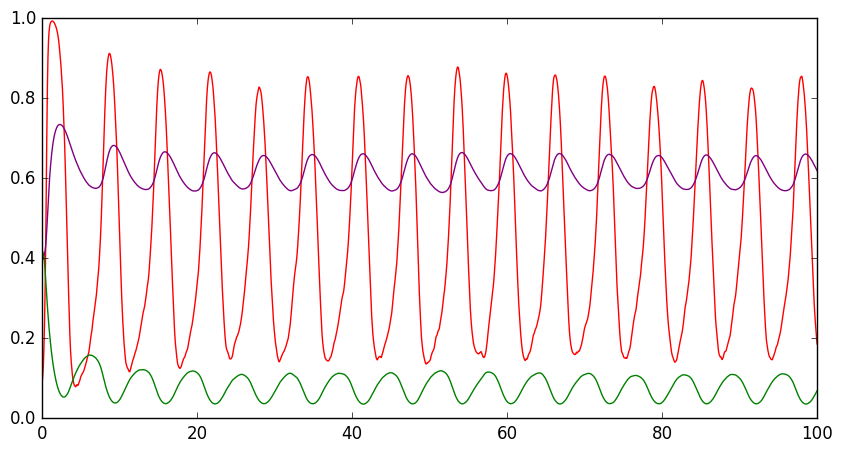

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f30a2a7aa20>

In [12]:
fig = figure("Numerical method",figsize=(10,5));    # Create a new figure, with desired size;
plot(t, m, "b-", color="red")
plot(t, n, "b-", color ="purple")
plot(t, h, "b-", color = "green")
